In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import pearsonr

In [4]:
Pricing = pd.read_excel('PricingOfDiamonds.xlsx')
Pricing

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,2757,3829.166667,45.345395,NR,SN
53936,53937,0.72,Good,D,SI1,63.1,2757,3829.166667,43.692552,SP,SN
53937,53938,0.70,Very Good,D,SI1,62.8,2757,3938.571429,43.901274,SN,SN
53938,53939,0.86,Premium,H,SI2,61.0,2757,3205.813953,45.196721,SN,SP


In [8]:
Pricing.dtypes

ID           int64
carat      float64
cut         object
colour      object
clarity     object
depth      float64
price        int64
x          float64
y          float64
P           object
PC          object
dtype: object

In [9]:
# Convert object variables to categorical type
object_vars = Pricing.select_dtypes(include='object').columns
Pricing[object_vars] = Pricing[object_vars].astype('category')


In [5]:
# Calculate the correlation matrix for numerical variables
numeric_vars = Pricing.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = Pricing[numeric_vars].corr()
corr_matrix

,ID,carat,depth,price,x,y
ID,1.000000,-0.377983,-0.034800,-0.306873,-0.323157,-0.305700
carat,-0.377983,1.000000,0.028224,0.921591,0.769744,0.919781
depth,-0.034800,0.028224,1.000000,-0.010647,-0.035669,-0.035402
price,-0.306873,0.921591,-0.010647,1.000000,0.912377,0.999430
x,-0.323157,0.769744,-0.035669,0.912377,1.000000,0.912458
y,-0.305700,0.919781,-0.035402,0.999430,0.912458,1.000000


<Axes: >

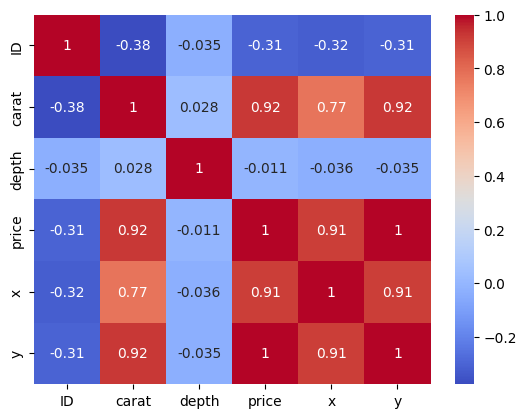

In [11]:
# Plot the correlation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [5]:
Pricing.isnull().sum()

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

In [7]:
Pricing.describe()

,ID,carat,depth,price,x,y
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,3932.799722,4008.394796,63.742880
std,15571.281097,0.474011,1.432621,3989.439738,2012.665747,64.775853
min,1.000000,0.200000,43.000000,326.000000,1051.162791,5.176651
25%,13485.750000,0.400000,61.000000,950.000000,2477.944444,15.394525
50%,26970.500000,0.700000,61.800000,2401.000000,3495.198032,39.001623
75%,40455.250000,1.040000,62.500000,5324.250000,4949.599702,86.419355
max,53940.000000,5.010000,79.000000,18823.000000,17828.846150,325.852373
